In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
import lftk

In [2]:
data_df = pd.read_csv(r"Datasets/Processed Data/data_features_extracted_df.csv")

In [3]:
data_df.head()

,text,Polarity,t_syll3,a_char_pw,simp_adj_var,simp_adv_var,simp_intj_var,simp_noun_var,simp_num_var,simp_pron_var,...,a_punct_pw,a_sconj_pw,a_sym_pw,a_verb_pw,a_space_pw,a_intj_ps,a_num_ps,a_pron_ps,a_propn_ps,smog
0,"You Can Smell Hillary’s FearDaniel Greenfield,...",0,56,4.22,0.80,0.66,0.0,0.66,0.60,0.17,...,0.08,0.02,0.0,0.11,0.02,0.0,0.06,1.39,1.77,4.58
1,Watch The Exact Moment Paul Ryan Committed Pol...,0,21,4.67,0.97,0.96,0.0,0.90,0.67,0.33,...,0.13,0.02,0.0,0.14,0.02,0.0,0.35,1.62,2.35,5.13
2,Kerry to go to Paris in gesture of sympathyU.S...,1,16,4.67,0.90,0.92,0.0,0.76,0.50,0.41,...,0.09,0.03,0.0,0.12,0.02,0.0,0.12,1.71,4.59,5.54
3,Bernie supporters on Twitter erupt in anger ag...,0,27,5.09,0.84,1.00,0.0,0.77,0.48,0.67,...,0.18,0.01,0.0,0.10,0.03,0.0,1.21,0.95,4.58,6.81
4,The Battle of New York: Why This Primary Matte...,1,11,4.31,0.85,0.92,0.0,0.65,1.00,0.43,...,0.15,0.02,0.0,0.12,0.03,0.0,0.38,1.00,2.76,4.13


In [4]:
import lftk
features = lftk.search_features(return_format="list_dict")

In [5]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from yellowbrick.model_selection import rfecv
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

In [6]:
X = data_df.drop(["text", "Polarity"], axis=1)
y = data_df["Polarity"]

In [7]:
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.15)

X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.transform(X_test)

## PCA

In [8]:
pca = PCA(random_state=42)

pca_fit = pca.fit(X_train_stand)
cum_explained_ratio = np.cumsum(pca_fit.explained_variance_ratio_)

In [12]:
len(cum_explained_ratio)

43

In [31]:
cum_explained_ratio = np.insert(cum_explained_ratio, 0, 0)

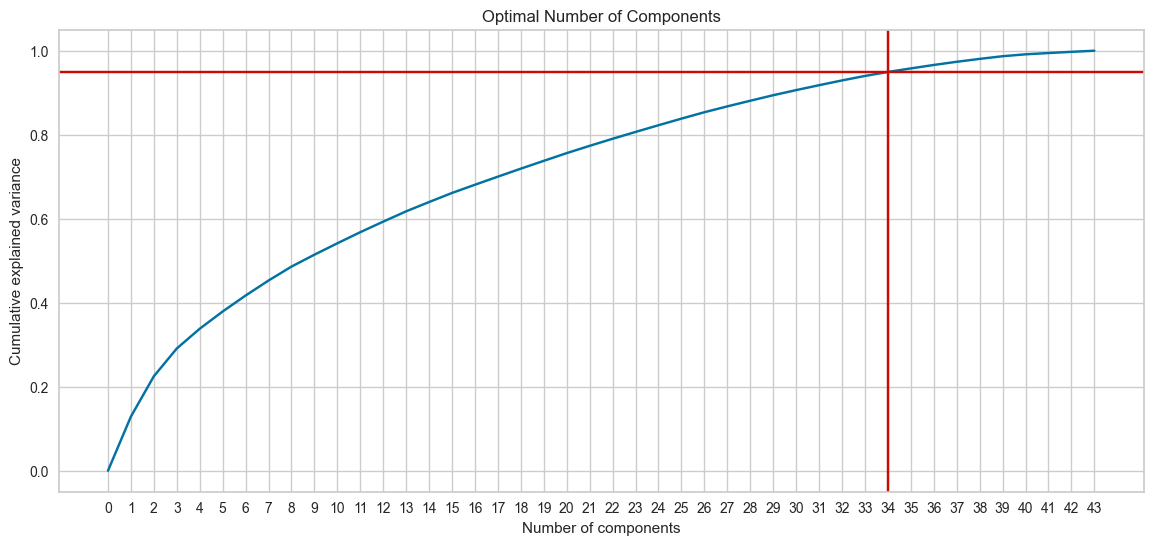

In [34]:
plt.figure(figsize=(14, 6))

plt.plot(cum_explained_ratio)

plt.axhline(y = 0.95, color = 'r', linestyle = '-')
plt.axvline(x = 34, color = 'r', linestyle = '-')

plt.xticks(ticks=np.arange(0, len(cum_explained_ratio), step=1), labels=np.arange(0, len(cum_explained_ratio)))

plt.title("Optimal Number of Components")


plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

## Recursive Feature Elimination

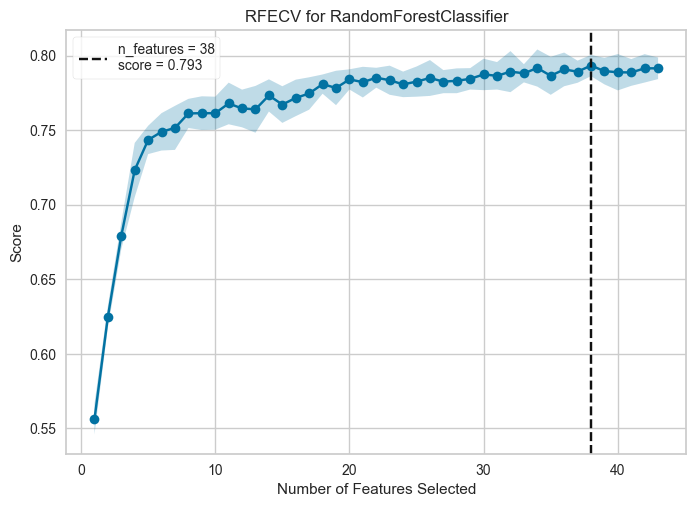

In [12]:
rfecv = rfecv(RandomForestClassifier(random_state=42), X_train_stand, y_train, scoring="f1_weighted")

In [13]:
from sklearn.feature_selection import RFE
rfe = RFE(RandomForestClassifier(random_state=42), n_features_to_select=7)

In [14]:
rfe.fit(X_train_stand, y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=7)

In [15]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True])

In [16]:
all_features = list(X.columns)
selection_mask = list(rfe.support_)

In [17]:
all_features

['t_syll3',
 'a_char_pw',
 'simp_adj_var',
 'simp_adv_var',
 'simp_intj_var',
 'simp_noun_var',
 'simp_num_var',
 'simp_pron_var',
 'simp_propn_var',
 'simp_sconj_var',
 'simp_sym_var',
 'simp_verb_var',
 'simp_space_var',
 'root_aux_var',
 'root_part_var',
 'root_propn_var',
 'root_space_var',
 'corr_adp_var',
 'corr_cconj_var',
 'corr_det_var',
 'corr_pron_var',
 'corr_punct_var',
 'corr_sconj_var',
 'uber_ttr_no_lem',
 'a_adj_pw',
 'a_adp_pw',
 'a_adv_pw',
 'a_aux_pw',
 'a_cconj_pw',
 'a_det_pw',
 'a_intj_pw',
 'a_noun_pw',
 'a_part_pw',
 'a_punct_pw',
 'a_sconj_pw',
 'a_sym_pw',
 'a_verb_pw',
 'a_space_pw',
 'a_intj_ps',
 'a_num_ps',
 'a_pron_ps',
 'a_propn_ps',
 'smog']

In [18]:
len(all_features)

43

In [19]:
selection_mask.count(False)

36

In [20]:
from itertools import compress

selected_features = list(compress(all_features, selection_mask))

In [21]:
selected_features

['t_syll3',
 'root_propn_var',
 'root_space_var',
 'corr_punct_var',
 'uber_ttr_no_lem',
 'a_propn_ps',
 'smog']

In [22]:
selected_features = ['t_syll3',
 'root_propn_var',
 'root_space_var',
 'corr_punct_var',
 'uber_ttr_no_lem',
 'a_propn_ps',
 'smog']

In [23]:
name_selected_features = [feature["name"] for feature in features if feature["key"] in selected_features]
name_selected_features

['total_number_of_words_more_than_three_syllables',
 'root_proper_nouns_variation',
 'root_spaces_variation',
 'corrected_punctuations_variation',
 'uber_type_token_ratio_no_lemma',
 'average_number_of_proper_nouns_per_sentence',
 'smog_index']